In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal


d = np.loadtxt('gmm_data.txt')
n = len(d)
k = 3
gmm = GaussianMixture(n_components = 3, init_params = 'random',tol = 0.001,covariance_type = 'spherical')
fits = gmm.fit(d)
labels = fits.predict(d)


means = fits.means_
pi = fits.weights_
covariance = fits.covariances_
std = np.sqrt(covariance)

d0 = d[labels== 0]
d1 = d[labels== 1] 
d2 = d[labels== 2] 


print('Parameters \n')
print('Mean shape: ',means.shape,'\n')
print('Mean: \n',means,'\n')

print('Standard deviation shape:',std.shape,'\n')
print('Std: \n',std,'\n')

print('pi shape: ',pi.shape,'\n')
print('Pi: \n',pi,)


Parameters 

Mean shape:  (3, 5) 

Mean: 
 [[-3.06176428e+00 -3.96696240e+00 -5.02048769e+00 -5.02021252e+00
  -6.00420335e+00]
 [ 2.99520441e+00  3.97929290e+00  4.93552594e+00  4.95000613e+00
   6.02926365e+00]
 [ 1.05250251e-02  4.16618640e-03  1.35683863e-02  1.00207924e-02
  -2.47443547e-02]] 

Standard deviation shape: (3,) 

Std: 
 [0.98486347 0.98920077 0.49584492] 

pi shape:  (3,) 

Pi: 
 [0.33333333 0.33333333 0.33333333]


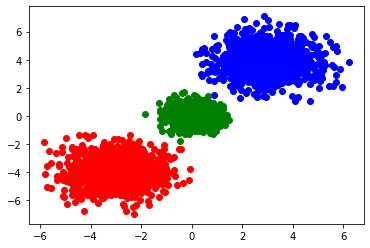

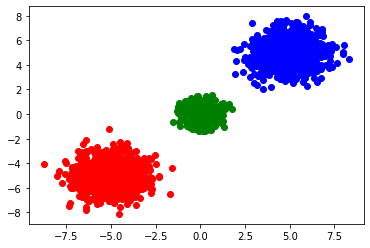

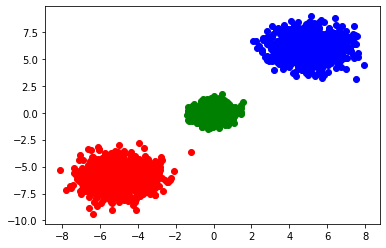

In [3]:
dim_12 = d[:,0:2]
d00 = dim_12[labels== 0] 
d01 = dim_12[labels== 1] 
d02 = dim_12[labels== 2]

dim_34 = d[:,2:4]
d10 = dim_34[labels==0]
d11 = dim_34[labels==1]
d12 = dim_34[labels==2]

dim_45 = d[:,3:]
d20 = dim_45[labels==0]
d21 = dim_45[labels==1]
d22 = dim_45[labels ==2]


plt.scatter(d00[:,0], d00[:,1], c ='r') 
plt.scatter(d01[:,0], d01[:,1], c ='b') 
plt.scatter(d02[:,0], d02[:,1], c ='g') 
plt.show()

plt.scatter(d10[:,0],d10[:,1],c='r')
plt.scatter(d11[:,0],d11[:,1],c='b')
plt.scatter(d12[:,0],d12[:,1],c='g')
plt.show()


plt.scatter(d20[:,0],d20[:,1],c='r')
plt.scatter(d21[:,0],d21[:,1],c='b')
plt.scatter(d22[:,0],d22[:,1],c='g')
plt.show()


In [4]:
weights = np.ones((n,k))/k
p_joint = np.zeros((n,k))


for i in range(k):
    for j in range(n):
        mul_norm = multivariate_normal.pdf(d[j,:],mean = means[i],cov = std[i])
        p_joint[j,i] = pi[i]*mul_norm
        
weights_den = p_joint.sum(axis=1)[:,np.newaxis]
weights = p_joint / weights_den


means_new = np.zeros((3,5))
for i in range(k):
    means_new[i] = np.average(d, axis =0,weights = weights[:,i])

print('Estimated mean: \n',means_new)        


Estimated mean: 
 [[-3.06176428e+00 -3.96696240e+00 -5.02048769e+00 -5.02021252e+00
  -6.00420335e+00]
 [ 2.99520441e+00  3.97929290e+00  4.93552594e+00  4.95000613e+00
   6.02926365e+00]
 [ 1.05250251e-02  4.16618640e-03  1.35683863e-02  1.00207924e-02
  -2.47443547e-02]]


In [13]:
weights = np.ones((n,k))/k

p_joint = np.zeros((n,k))


for i in range(k):
    for j in range(n):
        mul_norm = multivariate_normal.pdf(d[j,:],mean = means[i],cov = std[i])
        p_joint[j,i] = pi[i]*mul_norm
        
weights_den = p_joint.sum(axis=1)[:,np.newaxis]
weights = p_joint / weights_den


means_new = np.zeros((3,5))
for i in range(k):
    means_new[i] = np.average(d, axis =0,weights = weights[:,i])
    
pi_new = np.zeros(3)
pi_new = weights.sum(axis=0)/weights.sum()

print('Estimated pi: \n',pi_new)
print('Estimated mean: \n',means_new) 





Estimated pi: 
 [0.33333333 0.33333333 0.33333333]
Estimated mean: 
 [[-3.06176428e+00 -3.96696240e+00 -5.02048769e+00 -5.02021252e+00
  -6.00420335e+00]
 [ 2.99520441e+00  3.97929290e+00  4.93552594e+00  4.95000613e+00
   6.02926365e+00]
 [ 1.05250251e-02  4.16618640e-03  1.35683863e-02  1.00207924e-02
  -2.47443547e-02]]


In [12]:
pi_new2 = means.sum(axis=1)/means.sum()
pi_new2

array([ 1.35090590e+02, -1.34011339e+02, -7.92502524e-02])